## Part 1:  Exploratory Data Analysis

In [128]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


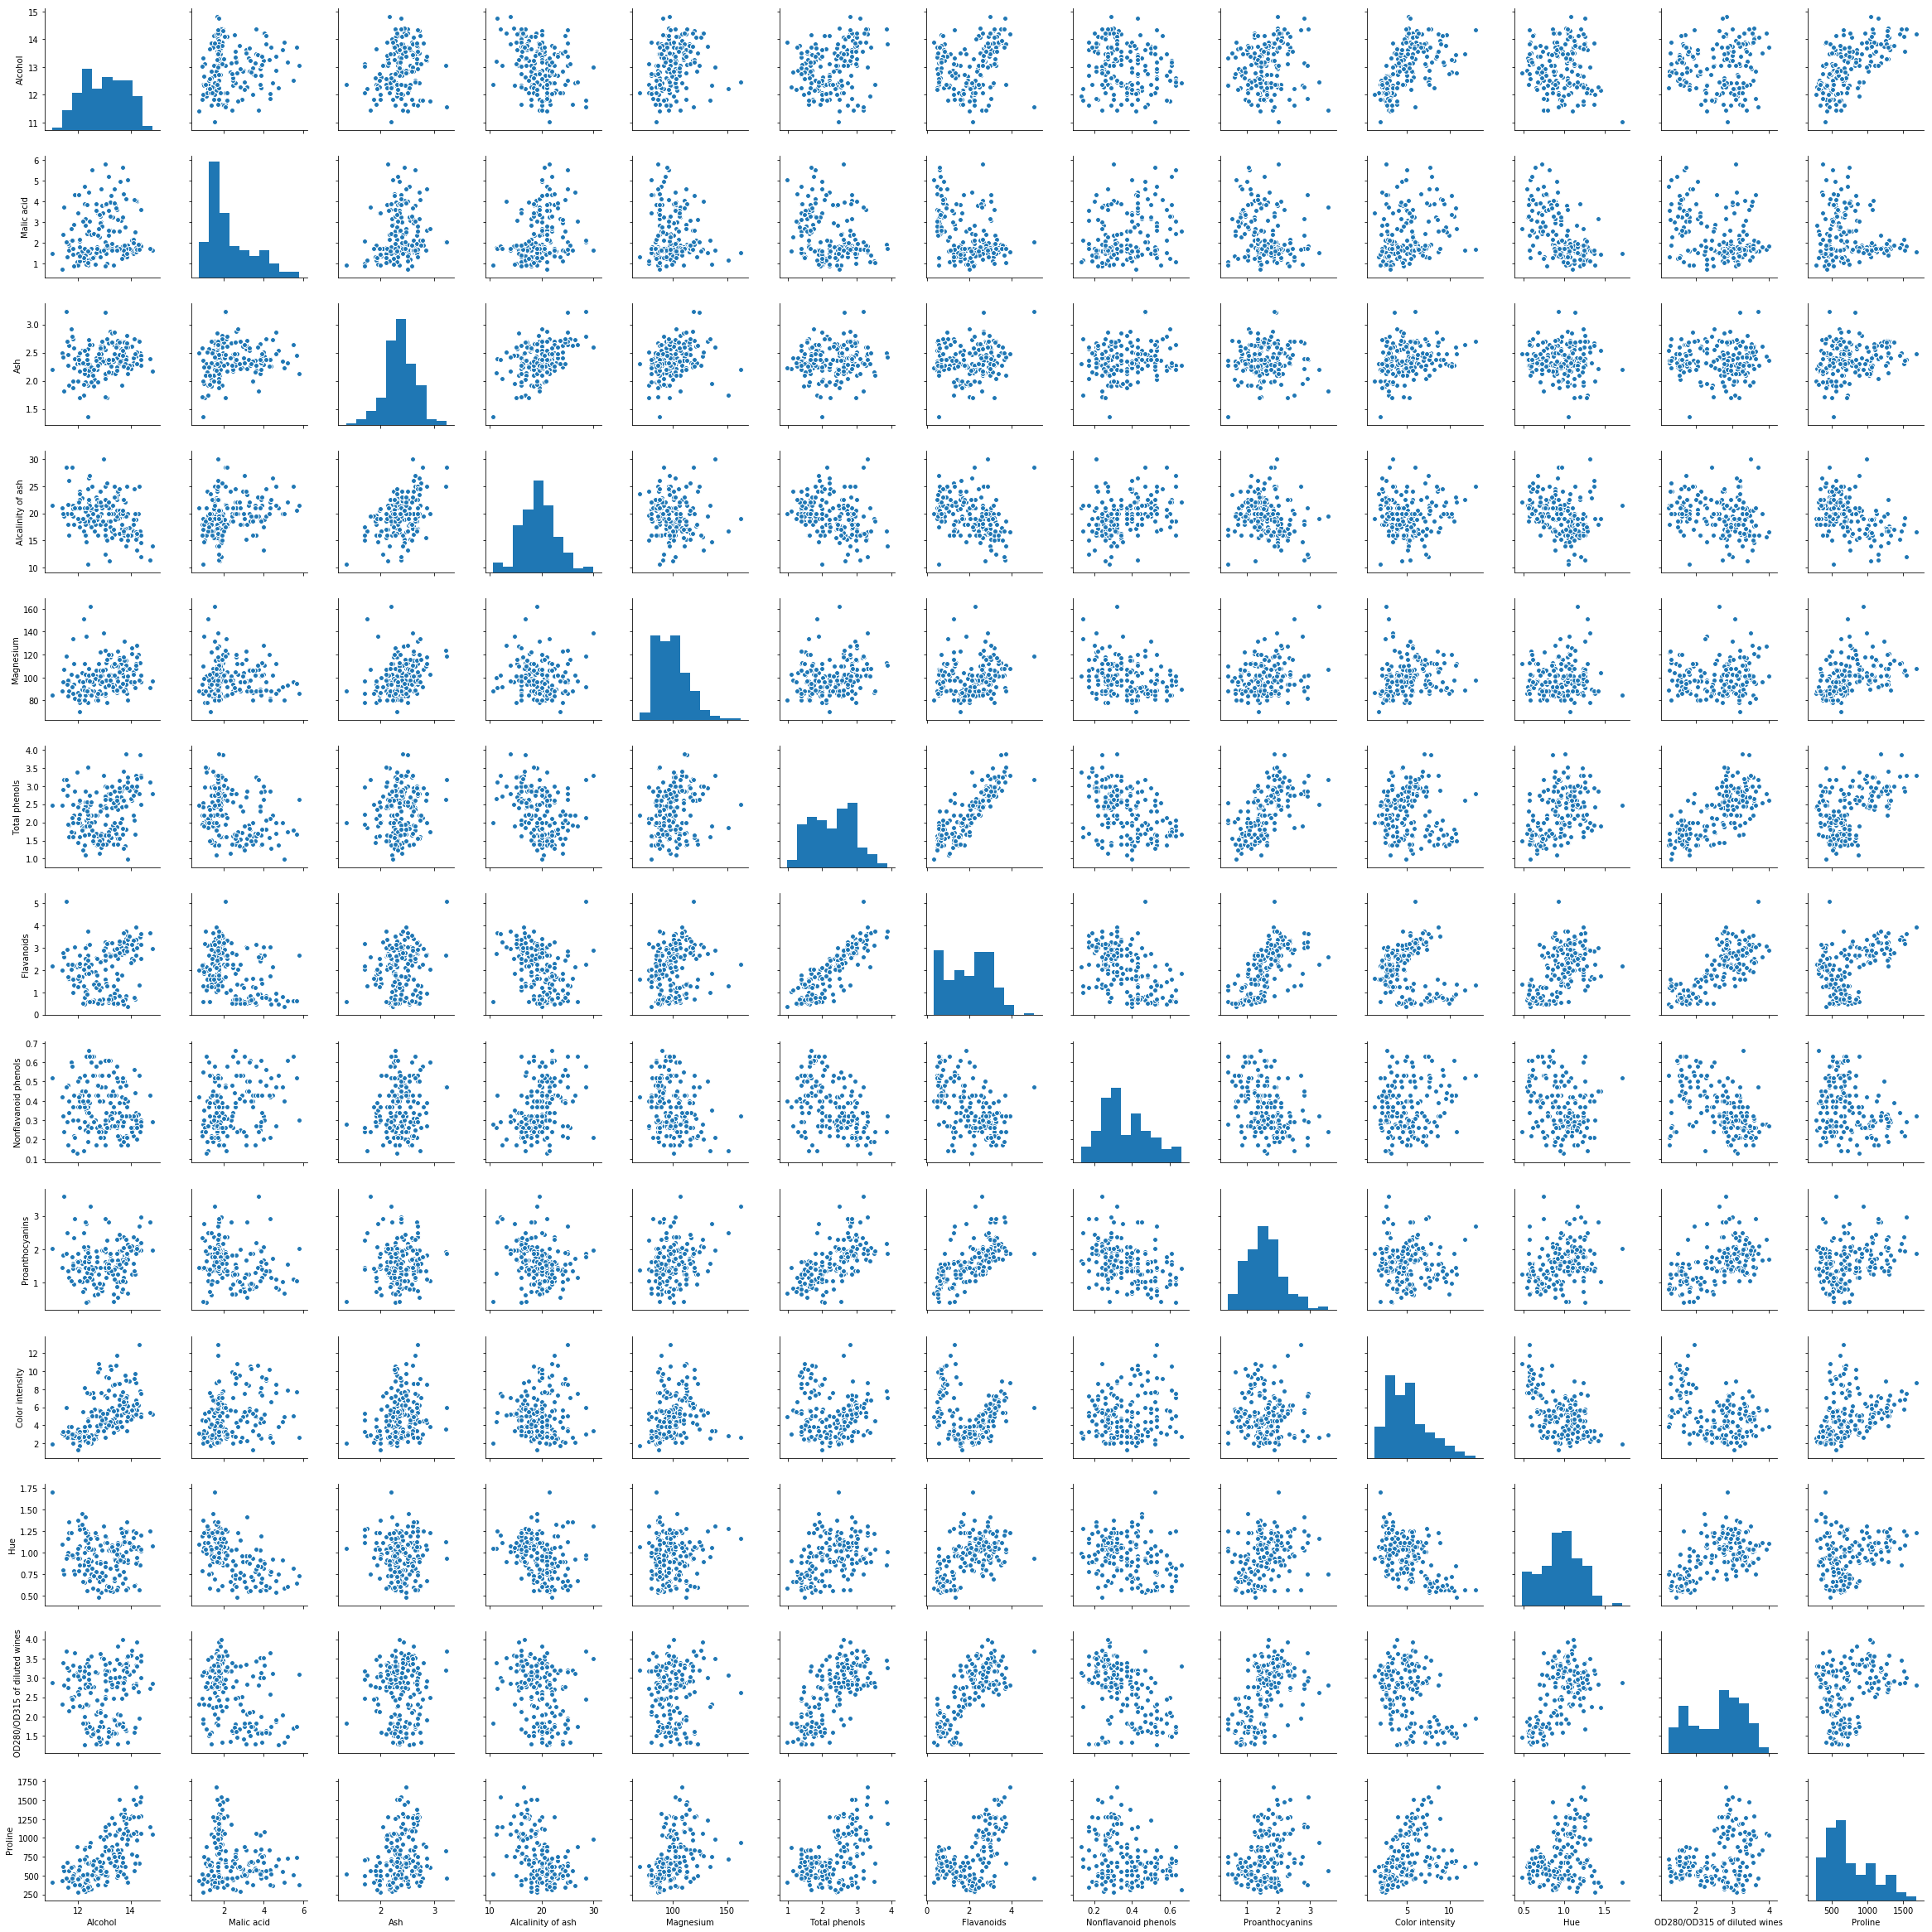

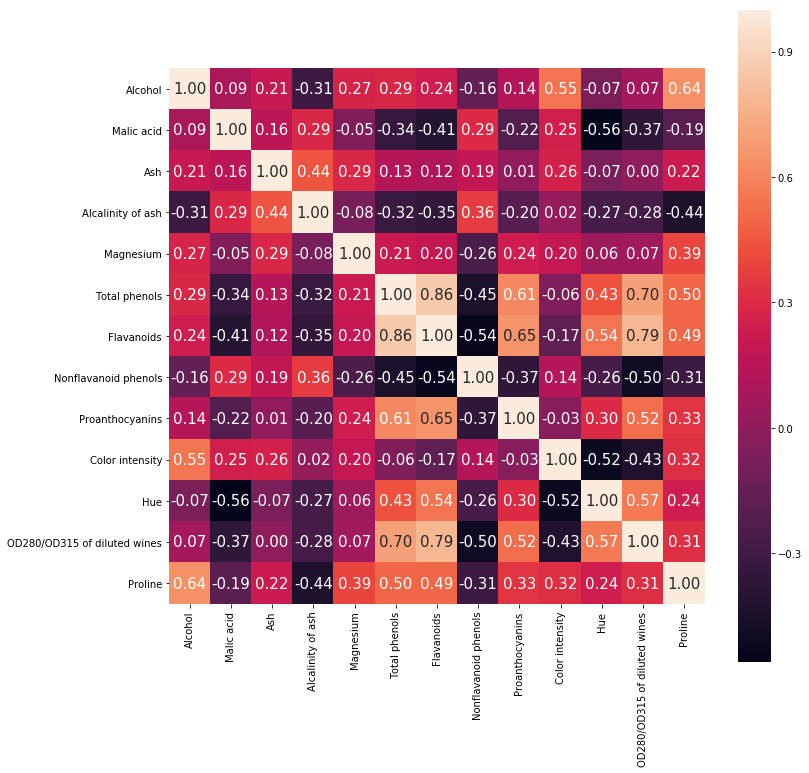

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns
cols = ['Alcohol', 'Malic acid', 'Ash',
        'Alcalinity of ash', 'Magnesium', 'Total phenols',
        'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
        'Color intensity', 'Hue',
        'OD280/OD315 of diluted wines', 'Proline']

sns.pairplot(df_wine[cols], size=2.5)
plt.tight_layout()
# plt.savefig('images/10_03.png', dpi=300)
plt.show()
import numpy as np

cm = np.corrcoef(df_wine[cols].values.T)
plt.figure(figsize = (12,12))
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)

plt.show()

## Part 2: Logistic regression classifier v. SVM classifier - baseline

preprosess data

In [130]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, 
                     stratify=y,
                     random_state=42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

Logistic regression classifier

In [131]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train)

from sklearn import metrics
y_train_pred = lr.predict(X_train_std)
y_test_pred = lr.predict(X_test_std)

print( metrics.accuracy_score(y_train, y_train_pred) )
print( metrics.classification_report(y_train, y_train_pred) )
print( metrics.confusion_matrix(y_train, y_train_pred) )

print( metrics.accuracy_score(y_test, y_test_pred) )
print( metrics.classification_report(y_test, y_test_pred) )
print( metrics.confusion_matrix(y_test, y_test_pred) )

1.0
             precision    recall  f1-score   support

          1       1.00      1.00      1.00        47
          2       1.00      1.00      1.00        57
          3       1.00      1.00      1.00        38

avg / total       1.00      1.00      1.00       142

[[47  0  0]
 [ 0 57  0]
 [ 0  0 38]]
0.9166666666666666
             precision    recall  f1-score   support

          1       1.00      0.92      0.96        12
          2       0.82      1.00      0.90        14
          3       1.00      0.80      0.89        10

avg / total       0.93      0.92      0.92        36

[[11  1  0]
 [ 0 14  0]
 [ 0  2  8]]


SVM classifier

In [132]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

from sklearn import metrics
y_train_pred = svm.predict(X_train_std)
y_test_pred = svm.predict(X_test_std)

print( metrics.accuracy_score(y_train, y_train_pred) )
print( metrics.classification_report(y_train, y_train_pred) )
print( metrics.confusion_matrix(y_train, y_train_pred) )

print( metrics.accuracy_score(y_test, y_test_pred) )
print( metrics.classification_report(y_test, y_test_pred) )
print( metrics.confusion_matrix(y_test, y_test_pred) )

1.0
             precision    recall  f1-score   support

          1       1.00      1.00      1.00        47
          2       1.00      1.00      1.00        57
          3       1.00      1.00      1.00        38

avg / total       1.00      1.00      1.00       142

[[47  0  0]
 [ 0 57  0]
 [ 0  0 38]]
0.9444444444444444
             precision    recall  f1-score   support

          1       1.00      0.92      0.96        12
          2       0.88      1.00      0.93        14
          3       1.00      0.90      0.95        10

avg / total       0.95      0.94      0.94        36

[[11  1  0]
 [ 0 14  0]
 [ 0  1  9]]


## Part 3: Perform PCA

Define plot(depending on different classifier)

In [133]:
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

Logistic regression

In [134]:
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
#Logistic regression
lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_pca, y_train)

y_train_pred = lr.predict(X_train_pca)
y_test_pred = lr.predict(X_test_pca)

print( metrics.accuracy_score(y_train, y_train_pred) )
print( metrics.classification_report(y_train, y_train_pred) )
print( metrics.confusion_matrix(y_train, y_train_pred) )

print( metrics.accuracy_score(y_test, y_test_pred) )
print( metrics.classification_report(y_test, y_test_pred) )
print( metrics.confusion_matrix(y_test, y_test_pred) )


0.971830985915493
             precision    recall  f1-score   support

          1       0.96      0.98      0.97        47
          2       0.98      0.95      0.96        57
          3       0.97      1.00      0.99        38

avg / total       0.97      0.97      0.97       142

[[46  1  0]
 [ 2 54  1]
 [ 0  0 38]]
0.8888888888888888
             precision    recall  f1-score   support

          1       0.92      0.92      0.92        12
          2       0.81      0.93      0.87        14
          3       1.00      0.80      0.89        10

avg / total       0.90      0.89      0.89        36

[[11  1  0]
 [ 1 13  0]
 [ 0  2  8]]


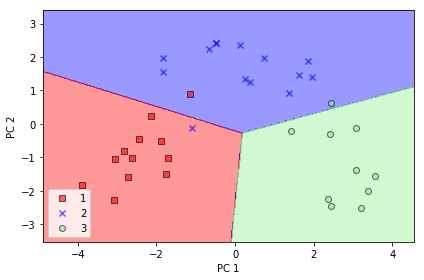

In [135]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train)

plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()

SVM classifier

In [136]:
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_pca, y_train)

y_train_pred = svm.predict(X_train_pca)
y_test_pred = svm.predict(X_test_pca)

print( metrics.accuracy_score(y_train, y_train_pred) )
print( metrics.classification_report(y_train, y_train_pred) )
print( metrics.confusion_matrix(y_train, y_train_pred) )

print( metrics.accuracy_score(y_test, y_test_pred) )
print( metrics.classification_report(y_test, y_test_pred) )
print( metrics.confusion_matrix(y_test, y_test_pred) )

0.9788732394366197
             precision    recall  f1-score   support

          1       0.96      1.00      0.98        47
          2       1.00      0.95      0.97        57
          3       0.97      1.00      0.99        38

avg / total       0.98      0.98      0.98       142

[[47  0  0]
 [ 2 54  1]
 [ 0  0 38]]
0.8888888888888888
             precision    recall  f1-score   support

          1       0.92      0.92      0.92        12
          2       0.81      0.93      0.87        14
          3       1.00      0.80      0.89        10

avg / total       0.90      0.89      0.89        36

[[11  1  0]
 [ 1 13  0]
 [ 0  2  8]]


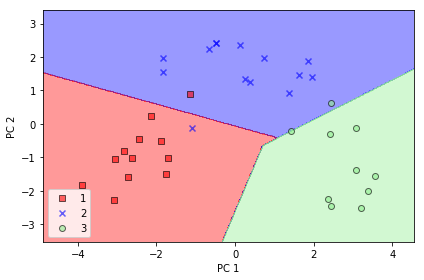

In [137]:
plot_decision_regions(X_test_pca, y_test, classifier=svm)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_05.png', dpi=300)
plt.show()

## Part 4: Perform and LDA

In [138]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.fit_transform(X_test_std, y_test)

Logistic Regression

In [139]:
lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_lda, y_train)

y_train_pred = lr.predict(X_train_lda)
y_test_pred = lr.predict(X_test_lda)

print( metrics.accuracy_score(y_train, y_train_pred) )
print( metrics.classification_report(y_train, y_train_pred) )
print( metrics.confusion_matrix(y_train, y_train_pred) )

print( metrics.accuracy_score(y_test, y_test_pred) )
print( metrics.classification_report(y_test, y_test_pred) )
print( metrics.confusion_matrix(y_test, y_test_pred) )

1.0
             precision    recall  f1-score   support

          1       1.00      1.00      1.00        47
          2       1.00      1.00      1.00        57
          3       1.00      1.00      1.00        38

avg / total       1.00      1.00      1.00       142

[[47  0  0]
 [ 0 57  0]
 [ 0  0 38]]
0.9722222222222222
             precision    recall  f1-score   support

          1       1.00      0.92      0.96        12
          2       0.93      1.00      0.97        14
          3       1.00      1.00      1.00        10

avg / total       0.97      0.97      0.97        36

[[11  1  0]
 [ 0 14  0]
 [ 0  0 10]]


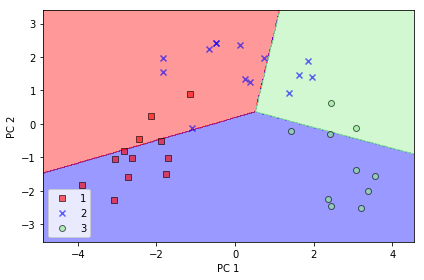

In [140]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()

SVM classifier

In [141]:
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_lda, y_train)

y_train_pred = svm.predict(X_train_lda)
y_test_pred = svm.predict(X_test_lda)

print( metrics.accuracy_score(y_train, y_train_pred) )
print( metrics.classification_report(y_train, y_train_pred) )
print( metrics.confusion_matrix(y_train, y_train_pred) )

print( metrics.accuracy_score(y_test, y_test_pred) )
print( metrics.classification_report(y_test, y_test_pred) )
print( metrics.confusion_matrix(y_test, y_test_pred) )

1.0
             precision    recall  f1-score   support

          1       1.00      1.00      1.00        47
          2       1.00      1.00      1.00        57
          3       1.00      1.00      1.00        38

avg / total       1.00      1.00      1.00       142

[[47  0  0]
 [ 0 57  0]
 [ 0  0 38]]
0.9722222222222222
             precision    recall  f1-score   support

          1       1.00      0.92      0.96        12
          2       0.93      1.00      0.97        14
          3       1.00      1.00      1.00        10

avg / total       0.97      0.97      0.97        36

[[11  1  0]
 [ 0 14  0]
 [ 0  0 10]]


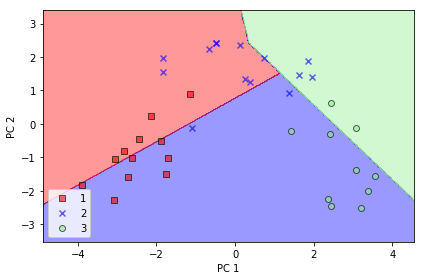

In [142]:
plot_decision_regions(X_test_pca, y_test, classifier=svm)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_05.png', dpi=300)
plt.show()

## Part 5: Perform a kPCA 

Logistic classifier

In [145]:
from sklearn.decomposition import KernelPCA
a=[0.1,50,150]
for i in a:
    scikit_kpca = KernelPCA(n_components=2, kernel='rbf',gamma=i)
    X_train_spca = scikit_kpca.fit_transform(X_train_std,y_train)
    X_test_spca = scikit_kpca.fit_transform(X_test_std,y_test)
    
    lr = LogisticRegression(C=100.0,random_state=1)
    lr.fit(X_train_spca,y_train)
    
    y_train_pred = lr.predict(X_train_spca)
    y_test_pred = lr.predict(X_test_spca)
    
    print('gamma = ',i)
    print('train sample:', metrics.accuracy_score(y_train,y_train_pred))
    print('test sample:',metrics.accuracy_score(y_test,y_test_pred))

gamma =  0.1
train sample: 0.9859154929577465
test sample: 0.3611111111111111
gamma =  50
train sample: 0.4014084507042254
test sample: 0.3888888888888889
gamma =  150
train sample: 0.4014084507042254
test sample: 0.3888888888888889


In [144]:
print("My name is Renjie Hu")
print("My NetID is: 659740767")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Renjie Hu
My NetID is: 659740767
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
